# -: Project 3    || Niladri Sekhar Sardar:-
## Comcast Telecom Consumer Complaints.
### Analysis Task :  To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.
#### - Import data into Python environment.

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim

In [2]:
df_ctcc = pd.read_csv('Comcast_telecom_complaints_data.csv',index_col=0)

In [3]:
df_ctcc.head(6)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df_ctcc[df_ctcc.isnull()].count()

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
df_ctcc.describe(include='all')

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,1841,91,91,2190,2,928,43,NaN,4,2
top,Comcast,24-06-15,24-Jun-15,11:59:36 AM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [6]:
df_ctcc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


### Analysis Task:
#### - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [7]:
df_ctcc['Date_month_year'] = pd.to_datetime(df_ctcc['Date_month_year'])
df_ctcc['Created_Month'] =  df_ctcc['Date_month_year'].apply(lambda x: x.month)
df_ctcc['Created_Day'] = df_ctcc['Date_month_year'].apply(lambda x: x.day)
df_ctcc['Created_Day of Week'] = df_ctcc['Date_month_year'].apply(lambda x: x.dayofweek)

In [8]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_ctcc['Created_Day of Week']=df_ctcc['Created_Day of Week'].map(dmap)
df_ctcc.head(7)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
Ticket #,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue
338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,6,Sun
361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,24,Wed


Text(0.8, 0.85, 'Max complaints in Jun')

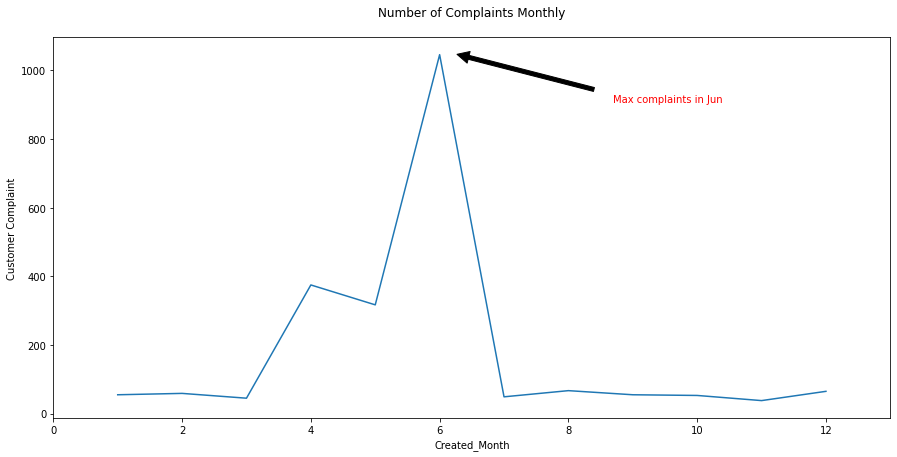

In [9]:
#number of complaints monthly
plt.figure(figsize=(15,7))
plt.title('Number of Complaints Monthly\n')
bymonth = df_ctcc.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = bymonth, sort=False,markers = "o")
ax = lp.axes
ax.set_xlim(0,13)
ax.annotate('Max complaints in Jun', color='red', xy=(6, 1060), xycoords='data', xytext=(0.8, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.1), horizontalalignment='right', verticalalignment='top')

(0.0, 32.0)

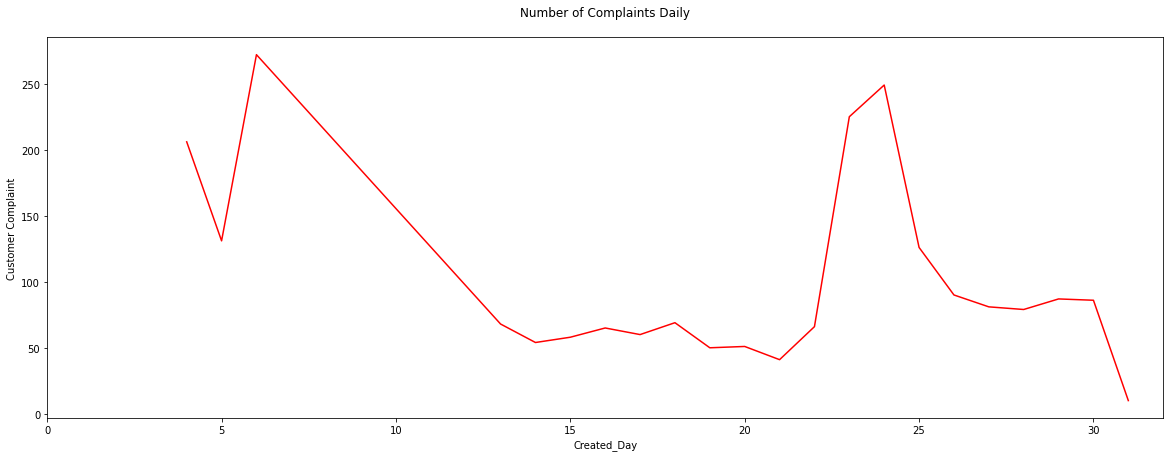

In [10]:
#number of complaints Daily
plt.figure(figsize=(20,7))
plt.title('Number of Complaints Daily\n')
byday = df_ctcc.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

<AxesSubplot:xlabel='Created_Day of Week', ylabel='count'>

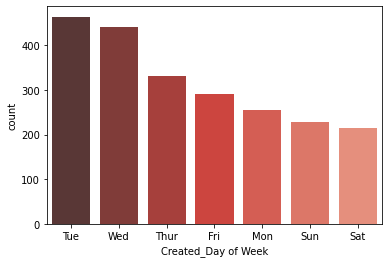

In [11]:
#number of complaints based on created day of the week
sns.countplot(x='Created_Day of Week', data = df_ctcc, order=df_ctcc['Created_Day of Week'].value_counts().index, palette ="Reds_d")


 More number of complaints on Tuesday and wednesday

### Analysis Task:
#### - Provide a table with the frequency of complaint types.

In [12]:
df_ctcc['Customer Complaint'] = df_ctcc['Customer Complaint'].str.title() 
CT_freq = df_ctcc['Customer Complaint'].value_counts()
CT_freq

Comcast                                                                           102
Comcast Data Cap                                                                   30
Comcast Internet                                                                   29
Comcast Data Caps                                                                  21
Comcast Billing                                                                    18
                                                                                 ... 
Internet Speeds Not As Advertised. Bandwith Not Available As Advertised             1
Xfinity Security System                                                             1
Comcast Charging Me Monthly Fees For Equipment Rental When I Own The Equipment      1
300 Gb Cap                                                                          1
Comcast Speed Integrity                                                             1
Name: Customer Complaint, Length: 1740, dtype: int64

In [13]:
common_complaints = df_ctcc['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1200,height=1000).generate(common_complaints)

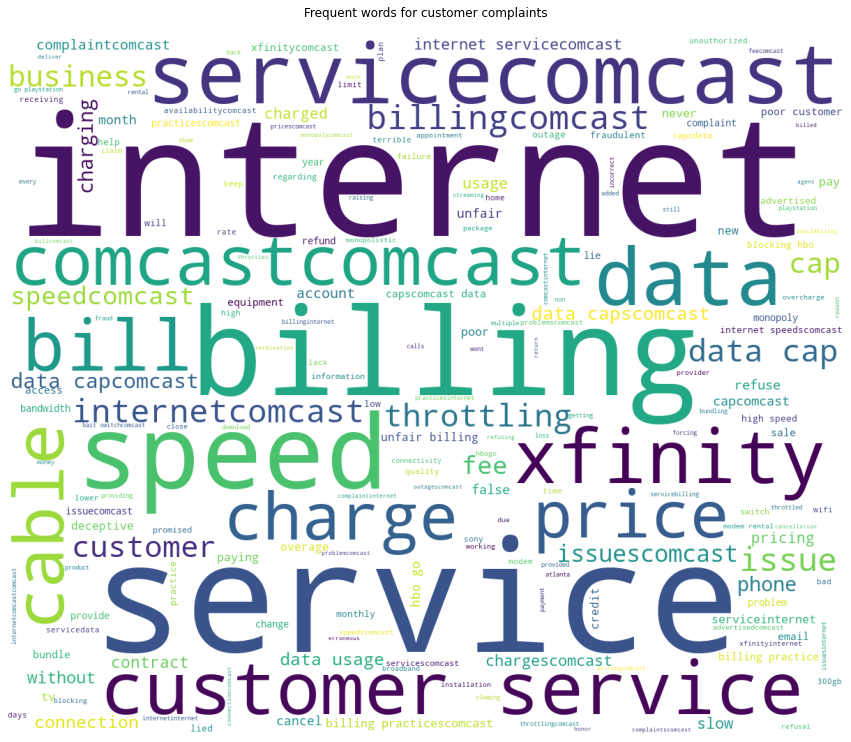

In [14]:
plt.figure( figsize=(15,15) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints\n')
plt.axis('off')
plt.show()

Internet complaints are Maximum

In [15]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/labsuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
doc_complete = df_ctcc['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [17]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [18]:
num_topic = 9
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.062*"fee" + 0.057*"comcastxfinity" + 0.052*"service" + 0.046*"outage" + 0.034*"installation" + 0.024*"comcast" + 0.023*"one" + 0.018*"billed" + 0.017*"area" + 0.016*"pricing"')

(1, '0.041*"monopolistic" + 0.033*"sale" + 0.028*"service" + 0.025*"monthly" + 0.024*"contract" + 0.022*"comcast" + 0.021*"increased" + 0.021*"signal" + 0.021*"several" + 0.020*"bill"')

(2, '0.103*"comcast" + 0.047*"price" + 0.026*"speed" + 0.024*"monopoly" + 0.021*"high" + 0.020*"paying" + 0.019*"payment" + 0.018*"help" + 0.016*"slowing" + 0.015*"mb"')

(3, '0.141*"comcast" + 0.122*"billing" + 0.062*"service" + 0.054*"charge" + 0.043*"practice" + 0.028*"unfair" + 0.022*"cable" + 0.020*"complaint" + 0.018*"problem" + 0.016*"connection"')

(4, '0.111*"comcast" + 0.091*"service" + 0.085*"issue" + 0.060*"billing" + 0.034*"pricing" + 0.024*"deceptive" + 0.022*"month" + 0.015*"incorrect" + 0.015*"unfair" + 0.015*"advertising"')

(5, '0.124*"bill" + 0.091*"comcast" + 0.031*"back" + 0.030*"credit" + 0.029*"cra

In [19]:
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]
pd.DataFrame(word_dict)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,fee,monopolistic,comcast,comcast,comcast,bill,internet,service,comcast
1,comcastxfinity,sale,price,billing,service,comcast,comcast,comcast,data
2,service,service,speed,service,issue,back,speed,complaint,cap
3,outage,monthly,monopoly,charge,billing,credit,service,customer,xfinity
4,installation,contract,high,practice,pricing,cramming,slow,internet,usage
5,comcast,comcast,paying,unfair,deceptive,without,throttling,poor,lack
6,one,increased,payment,cable,month,3,business,false,fee
7,billed,signal,help,complaint,incorrect,equipment,day,terrible,limit
8,area,several,slowing,problem,unfair,change,bandwidth,switch,home
9,pricing,bill,mb,connection,advertising,overcharge,pay,paying,charged


In [20]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_display)

### Analysis Task:
#### - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [21]:
df_ctcc['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df_ctcc["Status"]]
df_ctcc['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

### Analysis Task:
#### - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [22]:
df_ctcc['State'] = df_ctcc['State'].str.title() 
st_cmp = df_ctcc.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)
st_cmp

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<AxesSubplot:ylabel='State'>

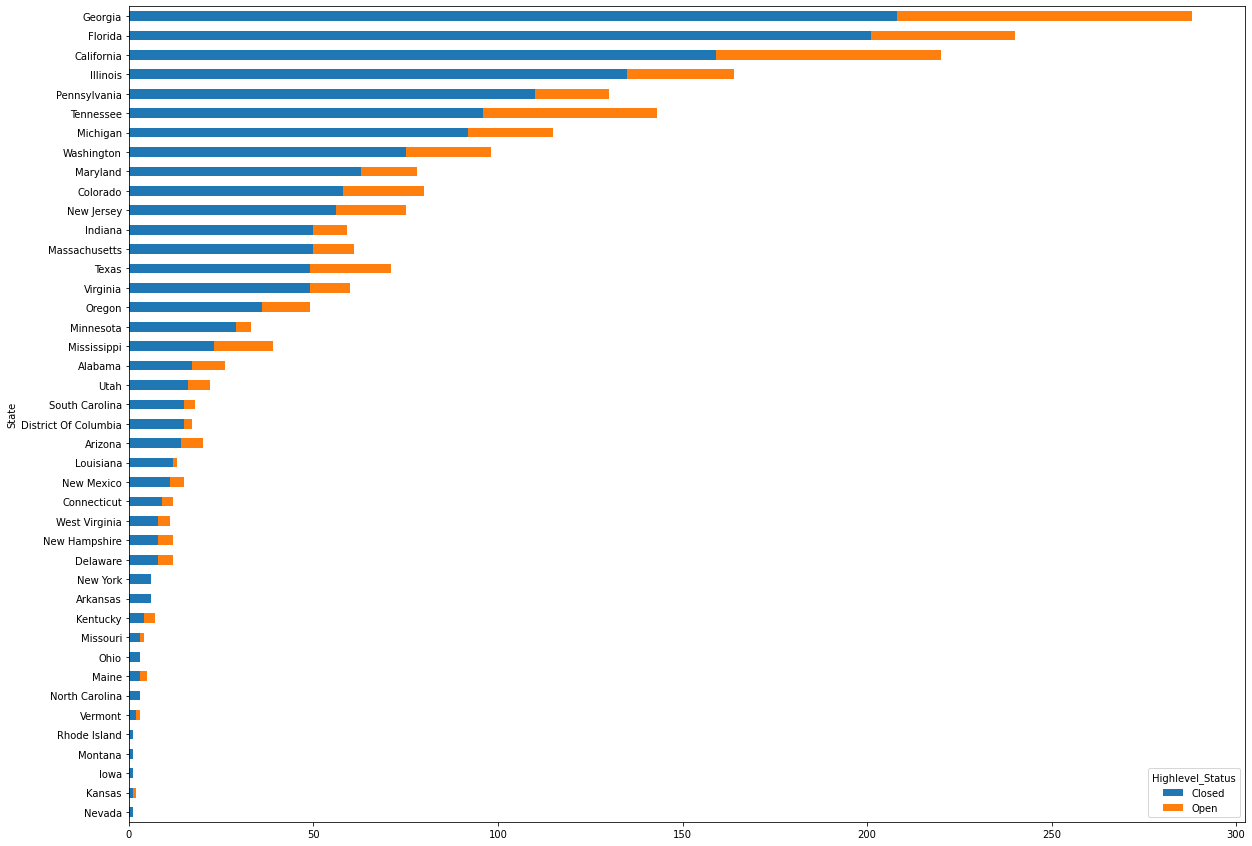

In [23]:
st_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(20,15), stacked=True)

### Analysis Task:
#### - Which state has the maximum complaints

In [24]:
df_ctcc.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

,Complaint count
State,
Georgia,288


In [25]:
CT = df_ctcc.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


Georgia has highest complaints

### Analysis Task:
#### - Which state has the highest percentage of unresolved complaints

In [26]:
#highest percentage of unresolved complaints
CT['Resolved_cmp_prct'] = CT['Closed']/CT['Closed'].sum()*100
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1] 

Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


Georgia state has highest Unresolved complaints when compared to other states

### Analysis Task:
#### - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [27]:
cr = df_ctcc.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
cr['resolved'] = cr['Closed']/cr['Closed'].sum()*100
cr['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64